In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import tweepy
import re
import os
%matplotlib inline

 ## GATHERING

In [18]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [37]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
image_predictions=pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
consumer_key= '9k5Cqf4iGJ4fVZuLgHIutjgb6'
consumer_secret= 'Ryziv2darHHpBGx4Lx2mgqbWPuwucwUpRLUucV5oMBguJwK1Gw'
access_token= '1316092001608237056-hr4OnbvJCIABgn4QQB6AsqgvplFNyc'
access_token_secret= 'wMBe5MNavIoBTCOSd3Eio3xzkRoQCFKp6M9F3n5qa2H1e'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [21]:
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [ ]:
twitter_list=[]
for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})
    

In [23]:
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count']) 
twitter_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7052,33900,9246037
1,892177421306343426,5325,29408,9245540
2,891815181378084864,3502,22123,9245540
3,891689557279858688,7258,37038,9245540
4,891327558926688256,7799,35372,9245964


## ACCESSING

## QUALITY
## twitter_archive: 
#####                 *Choose where retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp do not have value
#####                 * The type of timestamp is object, it should be datetime.
#####                 *  retweeted_status_timestamp is object
#####                 * source column is html 
#####                 * the mean of denominator is 10.45 which is supposed to be 10 /max()  
#####                 * Some dog  names are not correct.
#####                 * Text column contains text and URL
## image_predictions: 
#####                  * Some tweets do not contain dog pictures
## twitter_data:    
#####                   * twitter_data id column object should be integer


## Tidiness
#####                    * doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_stage".
#####                    * twitter api table columns(retweet_count, favorite_count, followers_count) should be added to twitter archive table.
 

In [24]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [42]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
2163,669375718304980992,NaN,NaN,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669375718...,6,10,Billl,None,None,None,None
540,806542213899489280,NaN,NaN,2016-12-07 16:53:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806542213...,11,10,Waffles,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None


In [26]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [27]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [29]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [74]:
twitter_archive[twitter_archive['text'].str.startswith('RT @')].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None


In [30]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
image_predictions[image_predictions['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [32]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1366 non-null   object
 1   retweet_count    1366 non-null   int64 
 2   favorite_count   1366 non-null   int64 
 3   followers_count  1366 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 42.8+ KB


# CLEANING

In [63]:
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
twitterapi_clean = twitter_data.copy()

In [64]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


## Define

In order go get original dog rating, we need to choose where retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp do not have value

## Code

In [65]:
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_id'])]
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_timestamp'])]

## Test

In [66]:
print(sum(archive_clean.retweeted_status_id.value_counts()))
print(sum(archive_clean.retweeted_status_user_id.value_counts()))
print(sum(archive_clean.retweeted_status_timestamp.value_counts()))

0
0
0


## Define

In order to change the types of the columns, we should use pandas function.

## Code

In [75]:
archive_clean['timestamp']=pd.to_datetime(archive_clean['timestamp'], errors='coerce')
archive_clean['retweeted_status_timestamp']=pd.to_datetime(archive_clean['retweeted_status_timestamp'], errors='coerce')

## Test

In [76]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

## Define

To find out from which device posts are shared, I need to extract some part of 'source' column.

## Code

In [77]:
archive_clean['source']=archive_clean['source'].str.extract('>([\w\W\s]*)<', expand=True)

## Test

In [78]:
archive_clean['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

## Define

the denominators is supposed to be 10. We can delete the rows which does not contain 10.

## Code

In [79]:
archive_clean=archive_clean[archive_clean['rating_denominator']==10]

## Test

In [80]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Define

Some dog names are not correctly inputted. 

## Code

In [81]:
archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [82]:
notaname=['None','such','a','not','one','incredibly','an','O','very','just','my','his','getting','by','the','dot','space','quite']

In [83]:
archive_clean['name']=archive_clean['name'].replace(notaname, None)


## Test

In [84]:
for i in notaname:
    if i in twitter_archive['name']:
        print("The column contains invalid name " , twitter_archive['name'])
    else: print('No such a word in the column')
    break

No such a word in the column


## Define

Text column contains 2 variables. It should be seperated.

## Code

In [85]:
archive_clean['text']=archive_clean['text'].str.rsplit(" ", n = 1, expand = True)[0]

## Test

In [86]:
archive_clean['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

## Define

Some tweets do not contain dog pictures

## Code

In [87]:
p1=image_clean[image_clean['p1_dog']==True]
p2=p1[p1['p2_dog']==True]
image_prediction=p2[p2['p3_dog']==True]

## Test

In [88]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True    1243
Name: p1_dog, dtype: int64
True    1243
Name: p2_dog, dtype: int64
True    1243
Name: p3_dog, dtype: int64


## Define

 twitter_data id column object should be integer

## Code

In [89]:
twitterapi_clean['tweet_id']=pd.to_numeric(twitterapi_clean['tweet_id'], errors='coerce')

## Test

In [90]:
twitterapi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         1366 non-null   int64
 1   retweet_count    1366 non-null   int64
 2   favorite_count   1366 non-null   int64
 3   followers_count  1366 non-null   int64
dtypes: int64(4)
memory usage: 42.8 KB


# Tidiness

## Define

doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_stage".

## Code

In [91]:
archive_clean[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1809
                pupper  None      224
doggo  None     None    None       75
None   None     None    puppo      24
doggo  None     pupper  None       10
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [92]:
archive_clean['add_all']=archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo']
archive_clean['add_all'].value_counts()

NoneNoneNoneNone        1809
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: add_all, dtype: int64

In [93]:
def dog_check(archive_clean):
    if archive_clean['add_all'].count('None')==2:
        return 'Multiple'
    else:
        if archive_clean['add_all'].count('doggo')==1:
            return 'Doogo'
        elif archive_clean['add_all'].count('floofer')==1:
            return 'Floofer'
        elif archive_clean['add_all'].count('pupper')==1:
            return 'Pupper'
        elif archive_clean['add_all'].count('puppo')==1:
            return 'Puppo'
        else:
            'None'
archive_clean['dog_stage']=archive_clean.apply(dog_check, axis=1)

In [94]:
archive_clean=archive_clean.drop(labels=['doggo', 'floofer','pupper','puppo','add_all'], axis=1)

## Test

In [95]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2153 non-null   int64           

## Define

twitter api table columns(retweet_count, favorite_count, followers_count) should be added to twitter archive table.

## Code

In [96]:
merged=pd.merge(archive_clean, twitterapi_clean, on='tweet_id',how='left')
twitter_table=pd.merge(merged,image_prediction , on='tweet_id',how='left')

## Test

In [97]:
twitter_table.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [98]:
twitter_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2153 non-null   int64           

## Storing Data

In [99]:
twitter_table.to_csv('twitter_archive_master.csv', index=False)

# Analysis and Visualizations

1. Tweet Timelime. Retweet count by month
2. Which source is used the most?
2. Top 10 most commmon dog name and most commin dog stage.
4. Is there correleation between retweet and favourite count?

In [100]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [101]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2153 non-null   int64  
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   timestamp                   2153 non-null   object 
 4   source                      2153 non-null   object 
 5   text                        2153 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               2099 non-null   object 
 10  rating_numerator            2153 non-null   int64  
 11  rating_denominator          2153 non-null   int64  
 12  name                        2153 non-null   object 
 13  dog_stage                   344 n

In [102]:
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp'], errors='coerce')
twitter_archive_master['retweeted_status_timestamp']=pd.to_datetime(twitter_archive_master['retweeted_status_timestamp'], errors='coerce')
twitter_archive_master['p1_dog']=twitter_archive_master['p1_dog'].astype(bool)
twitter_archive_master['p2_dog']=twitter_archive_master['p2_dog'].astype(bool)
twitter_archive_master['p3_dog']=twitter_archive_master['p3_dog'].astype(bool)

In [103]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2153 non-null   int64           

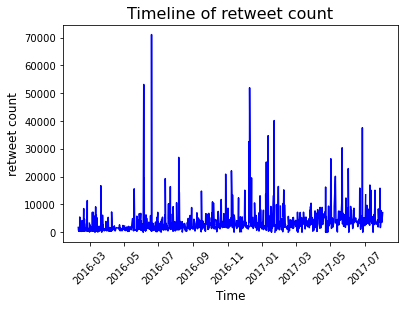

In [112]:
#twitter_archive_master['timestamp']
plt.plot(twitter_archive_master['timestamp'],twitter_archive_master['retweet_count'], color='blue')
plt.title('Timeline of retweet count', color='black', fontsize=16)
plt.xlabel('Time',color='black', fontsize=12)
plt.ylabel('retweet count', color='black', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

In [106]:
source = twitter_archive_master['source'].value_counts()
source

Twitter for iPhone     2020
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

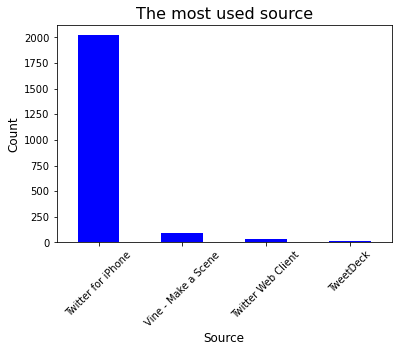

In [107]:
twitter_archive_master['source'].value_counts().plot(kind='bar', color='blue')

plt.title('The most used source',color='black', fontsize=16)
plt.xlabel('Source', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)
plt.xticks(rotation = 45)

plt.show()

In [108]:
twitter_archive_master['name'].value_counts().head(10)

Walter     33
Penny      18
Lucy       17
Cooper     16
Sadie      16
Daisy      16
Charlie    14
Oliver     14
Toby       13
Lola       12
Name: name, dtype: int64

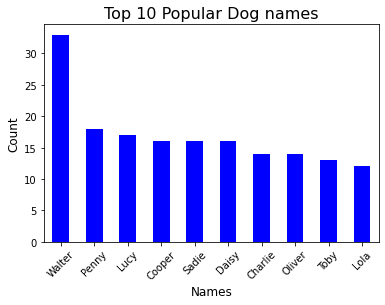

In [109]:
twitter_archive_master['name'].value_counts().head(10).plot(kind='bar', color='blue')

plt.title('Top 10 Popular Dog names',color='black', fontsize=16)
plt.xlabel('Names', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

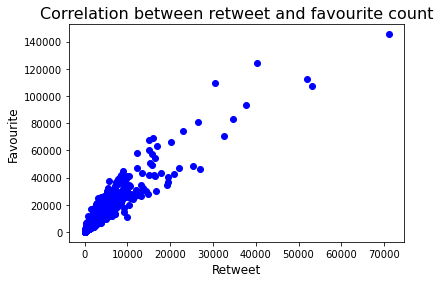

In [110]:
plt.scatter(twitter_archive_master['retweet_count'], twitter_archive_master['favorite_count'], color='blue')
plt.title('Correlation between retweet and favourite count',color='black', fontsize=16)
plt.xlabel('Retweet', color='black', fontsize=12)
plt.ylabel('Favourite', color='black', fontsize=12)
plt.show()

In [111]:
twitter_archive_master['retweet_count'].corr(twitter_archive_master['favorite_count'])
#0.9 correlation means there are positive relation between these variables.

0.9204148230965573